In [0]:
# imports all the libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
import numpy as np


# allow plots to appear directly in the notebook
%matplotlib inline

In [365]:
# read data into a DataFrame
data = pd.read_excel('Math Students Data Challenge.xlsx')
data.head()

,State,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support,Total_spending
0,Alabama,269.1943,257.4278,744548,5116627,3898347,5045,1884,502,400,7831
1,Alaska,281.5596,261.2561,131091,1321403,1707449,8151,6110,1497,1260,17018
2,Arizona,279.7223,260.4483,941726,4270089,2934165,4446,1265,567,410,6688
3,Arkansas,277.9148,261.9645,477716,3664741,3847045,5639,1556,484,798,8477
4,California,275.9014,261.5025,6208733,54627921,35141208,5567,2085,492,515,8659


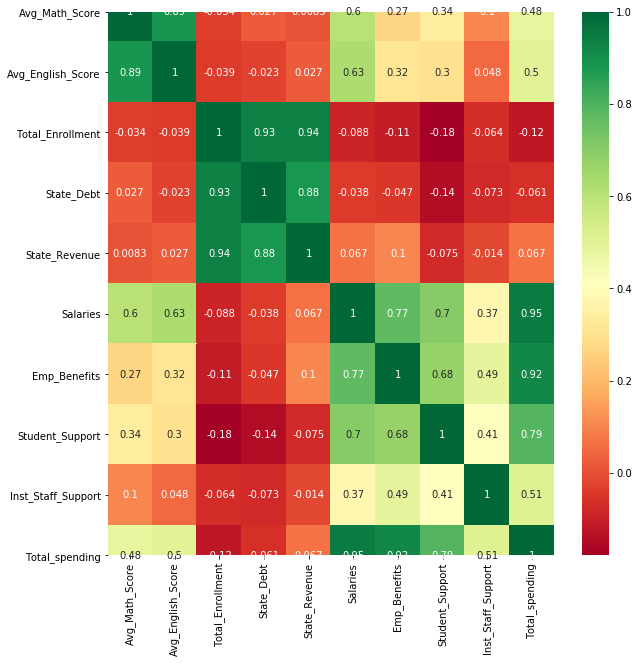

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


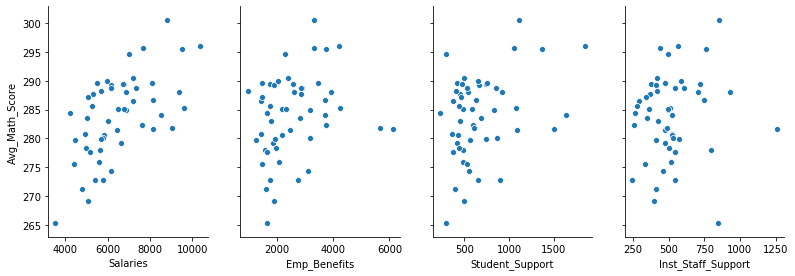

In [367]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Salaries','Emp_Benefits','Student_Support', 'Inst_Staff_Support'], 
             y_vars='Avg_Math_Score', size=4, aspect=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


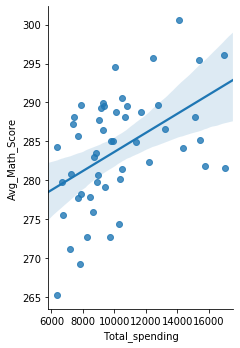

In [368]:
#visualize the relationship between the Total spending and the response using scatterplots
sns.pairplot(data, x_vars='Total_spending', y_vars='Avg_Math_Score', size=5, aspect=0.7, kind='reg')

In [369]:
#Test the assumptions of Linear Regression by checking pressence of Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Divide dataset into target variable and predictors
x = data.iloc[ : , 6:10]
y = data.iloc[ : , 1]
x2 = data.iloc[ : , 3:10] 

df = pd.DataFrame(x)
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)



,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support
Salaries,2.947258,-1.664409,-1.001241,0.122918
Emp_Benefits,-1.664409,2.977427,-0.599795,-0.581464
Student_Support,-1.001241,-0.599795,2.213257,-0.248385
Inst_Staff_Support,0.122918,-0.581464,-0.248385,1.340540


In [370]:
#Test multicollinearity with the VIF score

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                 26.116591
Salaries               2.947258
Emp_Benefits           2.977427
Student_Support        2.213257
Inst_Staff_Support     1.340540
dtype: float64

In [371]:
#Check for instability in coefficients with 4 variables under consideration
import statsmodels.api as sm
est = sm.OLS(y, x).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:         Avg_Math_Score   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              343.4
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                    3.87e-34
Time:                        23:58:55   Log-Likelihood:                         -273.55
No. Observations:                  51   AIC:                                      555.1
Df Residuals:                      47   BIC:                                      562.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [372]:
#Check for instability in coefficients after removing Salaries
x1 = data.iloc[ : , 7:10]
est2 = sm.OLS(y, x1).fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:         Avg_Math_Score   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              148.2
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                    2.88e-24
Time:                        23:58:55   Log-Likelihood:                         -301.09
No. Observations:                  51   AIC:                                      608.2
Df Residuals:                      48   BIC:                                      614.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

[0.46891151 0.14507641 0.22462439 0.16138769]


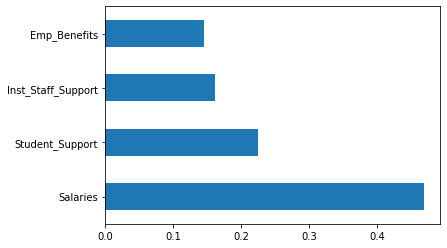

In [373]:
#Fit Random Forest Regressor with 4 variables
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor(n_estimators=10, max_features= 'auto', random_state=0, bootstrap= True)
score_rfr4 = cross_val_score(estimator=rfr, X=x, y=y, cv=5)
model = rfr.fit(x, y)
y_pred_rfr4 = model.predict(x)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


[0.03743027 0.09589827 0.06676616 0.454318   0.0831611  0.16715704
 0.09526917]


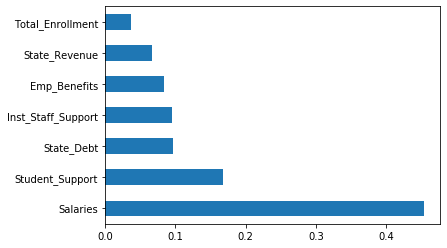

In [374]:
#Fit Random Forest Regressor with 7 variables
rfr = RandomForestRegressor(n_estimators=10, max_features= 'auto', random_state=0, bootstrap= True)
score_rfr7 = cross_val_score(estimator=rfr, X=x2, y=y, cv=5) 
rfr.fit(x2, y)
y_pred_rfr7 = rfr.predict(x2)
print(rfr.feature_importances_)
feat_importances = pd.Series(rfr.feature_importances_, index=x2.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.66609488 0.09612806 0.11127355 0.12650351]


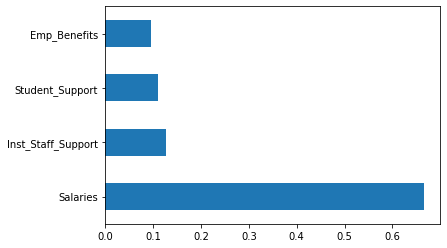

In [375]:
#Fit Gradient Boosting Regressor for 4 variables
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor(n_estimators=10, max_features= 'auto', random_state=0)
#print(gbr.get_params())
score_gbr4 = cross_val_score(estimator=rfr, X=x, y=y, cv=5) 
gbr.fit(x, y) 
y_pred_gbr4 = gbr.predict(x)
print(gbr.feature_importances_)
feat_importances = pd.Series(gbr.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.02559477 0.11453139 0.05470897 0.55216918 0.04584803 0.08485985
 0.1222878 ]


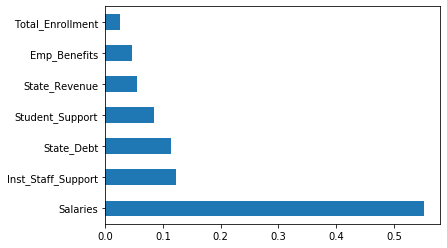

In [376]:
#Fit Gradient Boosting Regressor for 7 variables
gbr = ensemble.GradientBoostingRegressor(n_estimators=10, max_features= 'auto', random_state=0)
score_gbr7 = cross_val_score(estimator=rfr, X=x2, y=y, cv=5)
gbr.fit(x2, y) 
y_pred_gbr7 = gbr.predict(x2)
print(gbr.feature_importances_)
feat_importances = pd.Series(gbr.feature_importances_, index=x2.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [377]:
#Generate error table
from sklearn.metrics import mean_squared_error
rfr4 = mean_squared_error(y, y_pred_rfr4)
rfr7 = mean_squared_error(y, y_pred_rfr7)
gbr4 = mean_squared_error(y, y_pred_gbr4)
gbr7 = mean_squared_error(y, y_pred_gbr7)

errors = [[rfr4 , rfr7],
          [gbr4, gbr7]]

error_table = pd.DataFrame(errors, columns = ['Total features = 4', 'Total features = 7'])
error_table.rename(index= {0:'Random Forest', 1: 'Gradient Boosting'}, inplace=True)
display(error_table)

,Total features = 4,Total features = 7
Random Forest,6.035635,6.525759
Gradient Boosting,18.097836,16.851881


In [378]:
#Create new tables with allocated amount to 4 variables based on best model feature importance
data['Adj_salary'] = data.Salaries.values + 0.47*1000
data['Adj_emp_benefits'] = data.Emp_Benefits.values + 0.14*1000
data['Adj_student_support'] = data.Student_Support.values + 0.22*1000
data['Adj_staff_support'] = data.Inst_Staff_Support.values + 0.16*1000

new_features = data[['Adj_salary', 'Adj_emp_benefits', 'Adj_student_support', 'Adj_staff_support']]
new_features.head()

,Adj_salary,Adj_emp_benefits,Adj_student_support,Adj_staff_support
0,5515.0,2024.0,722.0,560.0
1,8621.0,6250.0,1717.0,1420.0
2,4916.0,1405.0,787.0,570.0
3,6109.0,1696.0,704.0,958.0
4,6037.0,2225.0,712.0,675.0


In [379]:
#Predict new marks after allocating budget
new_marks = model.predict(new_features)
new_marks

array([278.5875 , 285.466  , 279.33364, 281.98824, 288.134  , 284.13891,
       292.86457, 286.68039, 271.17597, 276.74902, 289.37157, 293.04324,
       288.15733, 296.02018, 280.13235, 289.46864, 288.45583, 288.04621,
       285.06495, 294.93178, 286.904  , 297.79371, 286.87505, 289.58967,
       275.80495, 287.89939, 286.23227, 288.12544, 279.86491, 294.44147,
       293.71638, 276.80902, 284.87179, 279.67998, 289.31123, 290.27451,
       279.21012, 278.92715, 289.0273 , 294.33161, 286.09765, 277.37353,
       274.88401, 286.31175, 280.32924, 295.86819, 288.9371 , 285.64363,
       286.5047 , 285.80577, 294.88984])

In [380]:
#add this new marks to the original table
data['New_marks'] = pd.DataFrame(new_marks)
data.head()

,State,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support,Total_spending,Adj_salary,Adj_emp_benefits,Adj_student_support,Adj_staff_support,New_marks
0,Alabama,269.1943,257.4278,744548,5116627,3898347,5045,1884,502,400,7831,5515.0,2024.0,722.0,560.0,278.58750
1,Alaska,281.5596,261.2561,131091,1321403,1707449,8151,6110,1497,1260,17018,8621.0,6250.0,1717.0,1420.0,285.46600
2,Arizona,279.7223,260.4483,941726,4270089,2934165,4446,1265,567,410,6688,4916.0,1405.0,787.0,570.0,279.33364
3,Arkansas,277.9148,261.9645,477716,3664741,3847045,5639,1556,484,798,8477,6109.0,1696.0,704.0,958.0,281.98824
4,California,275.9014,261.5025,6208733,54627921,35141208,5567,2085,492,515,8659,6037.0,2225.0,712.0,675.0,288.13400


In [0]:
#save results
data.to_csv('data.csv')